In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# https://www.kaggle.com/datasets/rohitudageri/credit-card-details

In [21]:
credit_card = pd.read_csv('Credit_card.csv')
credit_card

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [22]:
credit_card_label = pd.read_csv('Credit_card_label.csv')
credit_card_label
# this is what we want to predict

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


<Axes: xlabel='spam', ylabel='credit card rejected'>

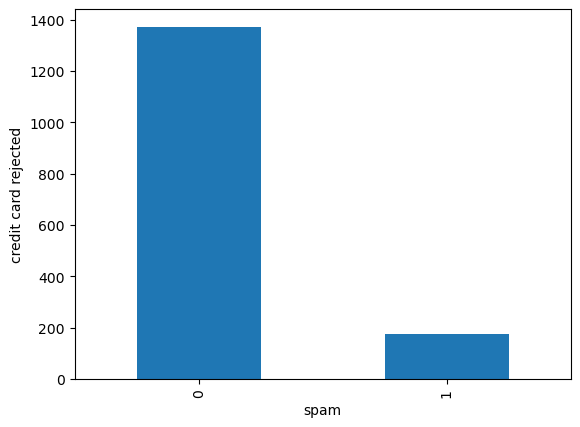

In [23]:
credit_card_label['label'].value_counts().plot.bar(ylabel='credit card rejected', xlabel='spam')
# imbalanced dataset

(array([ 37., 178., 433., 321., 286., 110.,  75.,  42.,  14.,  33.,   3.,
          4.,   3.,   1.,   0.,   1.,   1.,   0.,   4.]),
 array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000., 500000., 550000., 600000., 650000.,
        700000., 750000., 800000., 850000., 900000., 950000.]),
 <BarContainer object of 19 artists>)

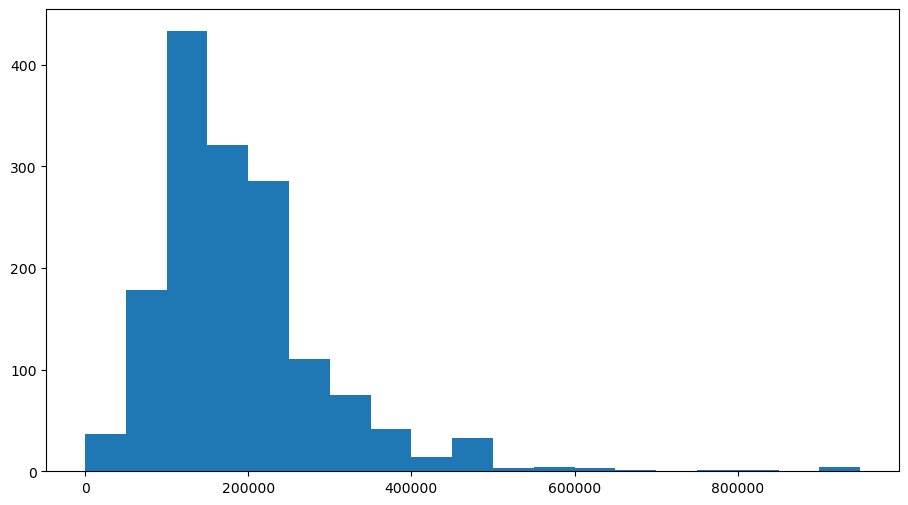

In [57]:
plt.figure(figsize=(11, 6))
plt.hist(credit_card['Annual_income'], bins=[i*50000 for i in range(20)])
# doesn't include all the values, but there aren't many above $1 million
# most of the values are between $50k and $250k

In [24]:
credit_card.isna().sum()
# Looks like there are nans in gender, annual_income, birthday_count, and type_occupation

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [25]:
credit_card['Annual_income_missing'] = credit_card['Annual_income'].isna()
credit_card['Birthday_count_missing'] = credit_card['Birthday_count'].isna()
credit_card

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Annual_income_missing,Birthday_count_missing
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,False,False
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,False,False
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,False,True
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,True,False
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,True,False
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,False,False
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,False,False
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,False,False


In [26]:
credit_card['Annual_income'].fillna(0, inplace=True)
credit_card['Birthday_count'].fillna(0, inplace=True)

In [30]:
credit_card_one_hot = pd.get_dummies(credit_card)
credit_card_one_hot

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,5009746,0,315000.0,0.0,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,5009749,0,0.0,-13557.0,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0.0,-11957.0,-2182,1,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = credit_card_one_hot.drop(['Ind_ID'], axis=1)
y = credit_card_label['label']
X, y

(      CHILDREN  Annual_income  Birthday_count  Employed_days  Mobile_phone  \
 0            0       180000.0        -18772.0         365243             1   
 1            0       315000.0        -13557.0           -586             1   
 2            0       315000.0             0.0           -586             1   
 3            0            0.0        -13557.0           -586             1   
 4            0       315000.0        -13557.0           -586             1   
 ...        ...            ...             ...            ...           ...   
 1543         0            0.0        -11957.0          -2182             1   
 1544         0       225000.0        -10229.0          -1209             1   
 1545         2       180000.0        -13174.0          -2477             1   
 1546         0       270000.0        -15292.0           -645             1   
 1547         0       225000.0        -16601.0          -2859             1   
 
       Work_Phone  Phone  EMAIL_ID  Family_Members

In [59]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [61]:
y_pred = classifier.predict(X_test)

In [62]:

from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
# logistic regression not doing so well

Confusion Matrix : 
 [[351   0]
 [ 36   0]]


In [63]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
y_train

1197    0
416     0
1234    0
31      1
583     0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: label, Length: 1161, dtype: int64